## Simple Data Cleaning Pipeline with Pandas: A Practical Approach

**Introduction:**

Welcome to this Jupyter Notebook where we explore the development and implementation of an efficient data cleaning pipeline using Python's Pandas library. This project is designed to showcase practical methods for handling common data issues such as duplicate values, outliers, and missing data.

**Throughout this notebook, we will:**

 - Define a sample DataFrame that simulates real-world data challenges.
 - Implement and explain a series of functions to clean and preprocess the data:
 - fill_missing_values to handle missing data.
 - drop_duplicates to remove duplicate entries.
 - remove_outliers to identify and eliminate outliers from the data.
 - Apply these functions in a pipeline to streamline the data cleaning process.
 - Analyze the before and after effects of the cleaning process with visual and statistical comparisons.

Our goal is to demonstrate a clear and efficient approach to data cleaning that can be applied in various data analysis and data science scenarios. Let's dive in!

## Requirements

To run this notebook, you need the following Python libraries:
- pandas (version 2.0.3)
- numpy (version 1.24.3)
- matplotlib (version 3.7.1)
- seaborn (version 0.13.0)

You can install these libraries using pip:

    pip install pandas numpy matplotlib seaborn

- First of all, we gonna import the necessary libraries:

In [4]:
import pandas as pd
import numpy as np

- Now we gonna define a DataFrame including duplicates, outliers, and missing values:

In [5]:
df = pd.DataFrame({
    'id': [1, 2, 2, 4, 5, 6, 7, 8, 9, 10],  # Duplicated value in the second row
    'Column2': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
    'Column3': [100, 200, 300, 400, 500, 600, 700, 8000, 900, 1000],  # Outlier in the eighth row
    'Column4': [np.nan, 1.1, 2.2, 3.3, np.nan, 5.5, 6.6, 7.7, 8.8, 9.9],  # Missing values in the first and fifth rows
    'Column5': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
})

- Print the dataframe and statistical sumaries after the data treatment:

In [6]:
# Printing a brief message to indicate the following output is prior to cleaning
print("Before Cleaning:\n")

# Displaying statistical summaries of the DataFrame before cleaning
# This includes count, mean, standard deviation, min, max, and quartiles
print(df.describe())

print('\n') # Adding a newline for better readability

# Displaying the DataFrame itself before any cleaning operations
# This helps in understanding the initial state of the data
print(df)

Before Cleaning:

              id      Column3   Column4     Column5
count  10.000000    10.000000  8.000000   10.000000
mean    5.400000  1270.000000  5.637500   55.000000
std     3.134042  2382.365771  3.190135   30.276504
min     1.000000   100.000000  1.100000   10.000000
25%     2.500000   325.000000  3.025000   32.500000
50%     5.500000   550.000000  6.050000   55.000000
75%     7.750000   850.000000  7.975000   77.500000
max    10.000000  8000.000000  9.900000  100.000000


   id Column2  Column3  Column4  Column5
0   1       A      100      NaN       10
1   2       B      200      1.1       20
2   2       C      300      2.2       30
3   4       D      400      3.3       40
4   5       E      500      NaN       50
5   6       F      600      5.5       60
6   7       G      700      6.6       70
7   8       H     8000      7.7       80
8   9       I      900      8.8       90
9  10       J     1000      9.9      100


**Diving into the Data Cleaning Pipeline: Tackling Noise with Precision**

In the realm of data analysis, the quality of data is paramount. Even the most sophisticated algorithms can falter with unclean data. Today, we embark on a journey to cleanse a noisy DataFrame, ensuring it's primed for insightful analysis. Our mission: to tackle three notorious data villains:




**Missing Values:** Absences can be as telling as presences, but in data, they often leave holes in our understanding. We'll build a bridge over these gaps, using intelligent imputation techniques to fill in the blanks without biasing our dataset.

    
**1- Function Definition:**

     def fill_missing_values(df): This line defines the function named fill_missing_values that takes a DataFrame df as its input.

**2- Loop Over Columns:**
     
     for col in df.select_dtypes(include=['int', 'float']).columns: The function loops over columns of the DataFrame that are of integer (int) or floating-point (float) data types.

**3- Calculate Mean:**

     val = df[col].mean(): For each numeric column, it calculates the mean (average) value of the column.

**4- Fill Missing Values:**

     df[col].fillna(val, inplace=True): It then fills any missing values (NaN) in the column with the calculated mean. The inplace=True argument modifies the DataFrame in place.

**5- Return DataFrame:**

     return df: Finally, the function returns the modified DataFrame with missing values filled in.
     
This function is designed to handle missing numerical data by imputing the mean, providing a simple yet effective way to maintain data integrity.

In [7]:
def fill_missing_values(df):
    # Iterating through each column in the DataFrame that is of numeric type (int or float)
    for col in df.select_dtypes(include=['int','float']).columns:
        
        # Calculating the mean of the current column
        val=df[col].mean()
        
        # Replacing all NaN (missing) values in the column with the calculated mean
        # The inplace=True argument ensures that the changes are made directly in the DataFrame
        df[col].fillna(val,inplace=True)
        
    # Returning the DataFrame after filling all missing values in numeric columns
    return df

**Duplicates:** Like uninvited clones, duplicated values can skew results and mislead analysis. We'll craft a function to seek out these imposters and ensure each data point is as unique as a fingerprint.
    
**1- Function Definition:**

     def drop_duplicates(df, column_name): This line defines the function named drop_duplicates that takes two arguments: a DataFrame df and a string column_name.

**2- Remove Duplicates:**

     df = df.drop_duplicates(subset=column_name): The function calls the drop_duplicates method on the DataFrame, specifying the subset parameter as column_name. This removes duplicate rows based on the specified column.

**3- Return DataFrame:** 

    return df: The modified DataFrame, now with duplicates removed from the specified column, is returned.

This function is geared towards ensuring data uniqueness, particularly in a column of interest, enhancing the reliability of the dataset.

In [8]:
def drop_duplicates(df, column_name):
    # Removing duplicate rows from the DataFrame based on a specific column.
    # The 'subset' parameter specifies the column name to check for duplicates.
    # If duplicate rows are found based on this column, only the first occurrence is kept.
    df = df.drop_duplicates(subset=column_name)

    # Returning the modified DataFrame with duplicates removed.
    return df

**Outliers:** These are the rebels of data, straying far from the norm. While sometimes valuable, more often, they distort our view of the data landscape. Our outlier-sniffing algorithm will find these extremes and evaluate their place in our analysis.

**1- Function Definition:** 
    
    def remove_outliers(df, column_list): Defines the function remove_outliers that takes a DataFrame df and a list of columns column_list as input.

**2- Loop Through Columns:** 
    
    for col in column_list: The function iterates over each column specified in column_list.

**3- Calculate Quartiles and IQR:**

    Q1 = df[col].quantile(0.25): Computes the first quartile (25th percentile) for the column.
    Q3 = df[col].quantile(0.75): Computes the third quartile (75th percentile) for the column.
    IQR = Q3 - Q1: Calculates the Interquartile Range (IQR), which is the difference between the third and first quartiles.

**4-Define Bounds for Outliers:**

    lower_bound = Q1 - 1.5 * IQR: Determines the lower bound for outliers.
    upper_bound = Q3 + 1.5 * IQR: Determines the upper bound for outliers.

**5- Filter Out Outliers:** 
    
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]: Filters the DataFrame, keeping only the rows where the column values fall within the defined bounds (between lower_bound and upper_bound).

**6- Return DataFrame:** 
    
    return df: Returns the DataFrame after removing outliers from the specified columns.

This function systematically identifies and removes outliers from specified columns, enhancing the overall data quality for analysis.

In [9]:
def remove_outliers(df, column_list):
    # Iterating over each column specified in the column_list
    for col in column_list:
        # Calculating the first quartile (25th percentile) of the column
        Q1 = df[col].quantile(0.25)

        # Calculating the third quartile (75th percentile) of the column
        Q3 = df[col].quantile(0.75)

        # Computing the Interquartile Range (IQR) as the difference between Q3 and Q1
        IQR = Q3 - Q1

        # Defining the lower bound to identify outliers (values significantly below the Q1)
        lower_bound = Q1 - 1.5 * IQR

        # Defining the upper bound to identify outliers (values significantly above the Q3)
        upper_bound = Q3 + 1.5 * IQR

        # Filtering the DataFrame to include only the rows where the column values
        # are within the defined range (i.e., not outliers)
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    # Returning the DataFrame after removing outliers from the specified columns
    return df


**Create Processed DataFrame:** df_processed = (df...: This line initializes the creation of a new DataFrame, df_processed, which will be the result of applying all the data cleaning functions that wee create to the original DataFrame df.

 **1- Apply fill_missing_values Function:**

    .pipe(fill_missing_values): The pipe method applies the fill_missing_values function to df. This function fills missing values in numeric columns with their mean.

**2- Apply drop_duplicates Function:**

    .pipe(drop_duplicates, 'id'): Next, pipe applies the drop_duplicates function with the argument 'id'. This removes duplicate rows based on the 'id' column.

**3- Apply remove_outliers Function:**

    .pipe(remove_outliers, ['Column3']): Finally, pipe applies the remove_outliers function with the argument ['Column3']. This removes outliers from the 'Column3' column based on the IQR method.

The pipe method chains these functions together in a sequence, passing the result of each function as the input to the next. The final result, df_processed, is the DataFrame with missing values filled, duplicates removed, and outliers filtered out from 'Column3'. This process streamlines multiple data cleaning steps into a cohesive and efficient workflow.


In [10]:
# Applying a series of data cleaning functions to the DataFrame 'df' using a pipeline approach

# The 'pipe' method allows for chaining functions. It passes the result of one function as input to the next.

# 1. Applying 'fill_missing_values' function
#    This fills any missing values in numeric columns with their mean.
df_processed = (df
                .pipe(fill_missing_values)  # Filling missing values in the DataFrame

                # 2. Applying 'drop_duplicates' function
                #    This removes duplicate rows based on the 'id' column.
                .pipe(drop_duplicates, 'id')  # Removing duplicates based on 'id'

                # 3. Applying 'remove_outliers' function
                #    This removes outliers in the 'Column3'.
                #    Outliers are determined based on the Interquartile Range (IQR) method.
                .pipe(remove_outliers, ['Column3']))  # Removing outliers from 'Column3'

# The result is a DataFrame where missing values have been filled,
# duplicates removed, and outliers in 'Column3' eliminated.


Examinate the dataframe and statistical sumaries after the data treatment:

In [11]:
# Print statements for showing the state of the DataFrame after cleaning

# Printing a brief message to indicate the following output is post-cleaning
print("\nAfter Cleaning:")

# Displaying statistical summaries of the DataFrame after cleaning
# This includes count, mean, standard deviation, min, max, and quartiles for each column
# It helps in understanding the changes brought by the cleaning process
print(df_processed.describe())
print('\n')  # Adding a newline for better readability

# Displaying the DataFrame itself after all cleaning operations
# This output will reflect the data after handling missing values, duplicates, and outliers
print(df_processed)


After Cleaning:
              id      Column3   Column4     Column5
count   8.000000     8.000000  8.000000    8.000000
mean    5.500000   550.000000  5.809375   55.000000
std     3.162278   316.227766  2.801329   31.622777
min     1.000000   100.000000  1.100000   10.000000
25%     3.500000   350.000000  4.950000   35.000000
50%     5.500000   550.000000  5.637500   55.000000
75%     7.500000   750.000000  7.150000   75.000000
max    10.000000  1000.000000  9.900000  100.000000


   id Column2  Column3  Column4  Column5
0   1       A      100   5.6375       10
1   2       B      200   1.1000       20
3   4       D      400   3.3000       40
4   5       E      500   5.6375       50
5   6       F      600   5.5000       60
6   7       G      700   6.6000       70
8   9       I      900   8.8000       90
9  10       J     1000   9.9000      100


## Visual Comparison: Before and After Data Cleaning

In this section, we visually compare the distribution of values in 'Column3' before and after applying our data cleaning pipeline. This will help us understand the impact of our cleaning process, particularly regarding outlier removal.

Histograms Before and After Cleaning:

We use histograms to visualize the distribution of values in 'Column3'. The goal is to observe how the distribution changes after removing outliers and how it affects the overall data quality.



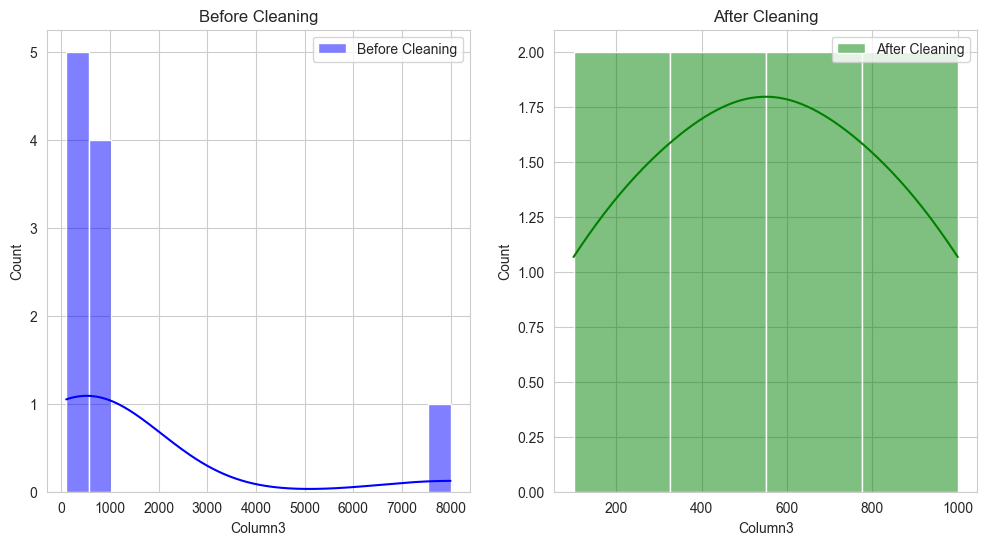

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots to 'whitegrid' for better readability
sns.set_style("whitegrid")

# Creating a figure with two subplots for side-by-side comparison
plt.figure(figsize=(12, 6))

# First Subplot: Histogram of 'Column3' Before Cleaning
plt.subplot(1, 2, 1)
# Creating a histogram with a Kernel Density Estimate (KDE) overlay for 'Column3' before cleaning
sns.histplot(df['Column3'], kde=True, color='blue', label='Before Cleaning')
# Setting the title of the first subplot
plt.title('Before Cleaning')
# Adding a legend to the first subplot
plt.legend()

# Second Subplot: Histogram of 'Column3' After Cleaning
plt.subplot(1, 2, 2)
# Creating a histogram with a KDE overlay for 'Column3' after cleaning
sns.histplot(df_processed['Column3'], kde=True, color='green', label='After Cleaning')
# Setting the title of the second subplot
plt.title('After Cleaning')
# Adding a legend to the second subplot
plt.legend()

# Displaying the plots
plt.show()


The histograms provide a clear visual comparison between the original and cleaned data in 'Column3'. By analyzing these plots, we can assess the effectiveness of our outlier removal strategy and its impact on the data distribution. Such visual insights are invaluable in data preprocessing and exploratory analysis.

## Observations from Data Cleaning Process

- **Before Cleaning:** The histogram shows a broad distribution with a significant peak, suggesting the presence of outliers.

- **After Cleaning:** Post-cleaning, the distribution appears more centered and normalized, indicating the effective removal of outliers.

These visual changes in the distribution of 'Column3' demonstrate the impact of our outlier removal process. The standard deviation has likely reduced, reflecting a dataset that more accurately represents the underlying trends without the distortion of extreme values.



## Interpretation of Changes
The cleaning process has crucially improved the quality of our dataset:

- **Removing Duplicates:** Ensures each data point is unique, preventing skewed analysis due to repeated entries.
- **Outlier Removal:** By eliminating extreme values in 'Column3', we've likely enhanced the accuracy of any statistical or machine learning models that will be applied to this dataset.
- **Handling Missing Values:** Filling missing values in numeric columns with the mean provides a balanced approach to maintain dataset integrity without introducing significant bias.

Overall, these steps contribute to a dataset that is more robust and reliable for analysis, laying a solid foundation for any further data exploration or modeling.